# LungCancer prediction|Logistic Regression

In [42]:
# 0 alive(doesnt have lung cancer)
# 1 dead(have lung cancer)

In [3]:
#importing library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report ,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [62]:
#loading dataset
cancer_df = pd.read_csv(r'C:\Users\siddi\Downloads\archive (4)\lung_cancer_examples.csv')
cancer_df.head(5)

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [ ]:
#dropping columns which has low variance

In [63]:
cancer_df= cancer_df.drop('Name', axis = 1)
cancer_df= cancer_df.drop('Surname', axis = 1)

In [43]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     59 non-null     int64
 1   Smokes  59 non-null     int64
 2   AreaQ   59 non-null     int64
 3   Alkhol  59 non-null     int64
 4   Result  59 non-null     int64
dtypes: int64(5)
memory usage: 2.4 KB


In [64]:
cancer_df.shape

(59, 5)

In [77]:
cancer_df['Result'].value_counts()
#31 people have lung cancer
#28 people have lung cancer
#there is not much differnce in the dataset

0    31
1    28
Name: Result, dtype: int64

In [68]:
cancer_df.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


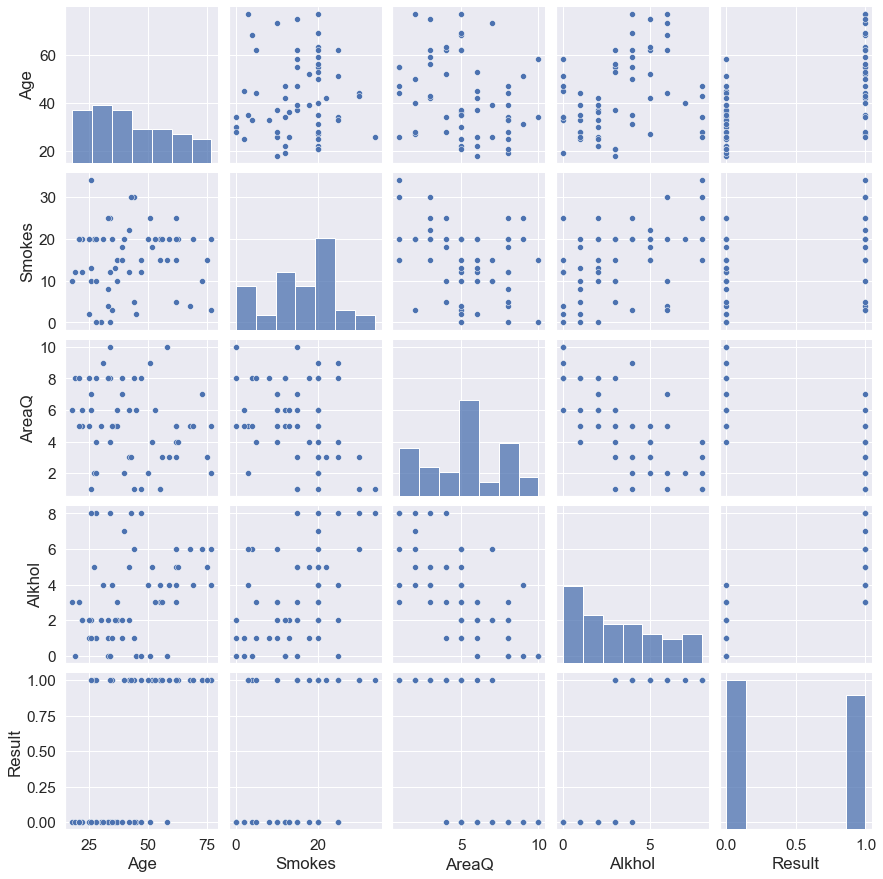

In [75]:
import seaborn as sns
sns.pairplot(cancer_df)

In [78]:
cancer_df.describe()

,Age,Smokes,AreaQ,Alkhol,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,42.627119,15.067797,5.203390,3.237288,0.474576
std,16.235230,7.984607,2.461984,2.380517,0.503640
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,7.500000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


In [82]:
#creating independent and dependent variable
y = cancer_df['Result']
X = cancer_df[['Smokes' ,'Age','AreaQ' ,'Alkhol']]

In [83]:
#splitting the data into training and testing data
X_train ,X_test , y_train , y_test =train_test_split(X,y,test_size = 0.1,random_state = 0)

In [84]:
X_train.shape

(53, 4)

In [85]:
X_test.shape

(6, 4)

In [86]:
y_test.value_counts()

0    4
1    2
Name: Result, dtype: int64

In [88]:
#predicting
#X_train

In [20]:
from sklearn.linear_model import LogisticRegression
#Fitting logistic regression to the training set
import sklearn
from sklearn import linear_model
reg = LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred = reg.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))

Accuracy score: 1.0


In [22]:
confusion_matrix(y_test, y_pred)

array([[4, 0],
       [0, 2]], dtype=int64)

[Text(0.5, 8.5, 'Predicted'), Text(23.26, 0.5, 'Actual')]

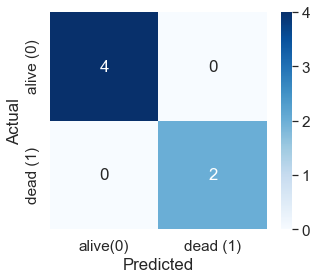

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,4))
sns.set(font_scale=1.4)
ax = sns.heatmap(confusion_matrix, cmap='Blues',annot=True, fmt='d', square=True, xticklabels=['alive(0)', 'dead (1)'], yticklabels=['alive (0)', 'dead (1)'])
ax.set(xlabel='Predicted', ylabel='Actual')

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



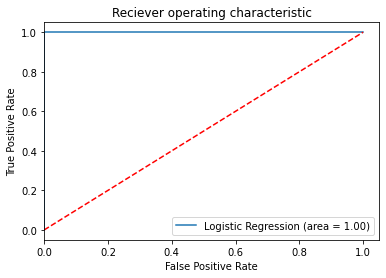

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)'% logit_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever operating characteristic')
plt.legend(loc = "lower right")
plt.savefig('Log_ROC')
plt.show()

In [90]:
predict=reg.predict([[43,30,3,8]])

C:\Users\siddi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [91]:
predict

array([1], dtype=int64)